In [1]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
dataset = load_wine()
x, y = dataset.data, dataset.target
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size = 0.3, random_state = 42)

In [3]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 8, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [10, 20, 50, 100, 200]
}

In [4]:
clf = RandomForestClassifier(random_state = 42)
grid_cv = GridSearchCV(clf, parameters, cv = 10, n_jobs = -1)
grid_cv.fit(x_train, y_train)

c:\Users\gutsc\Documents\Coding\LangChain_Udemy\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
2000 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1380 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gutsc\Documents\Coding\LangChain_Udemy\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gutsc\Documents\Coding\LangChain_Udemy\.venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\gutsc\Documents\Coding\LangChain_Udemy\.venv\Lib\site-packages\sklearn\base.

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [1, 2], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,20


In [5]:
print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")

Parameters of best model: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}
Score of best model: 0.9839743589743589


In [6]:
score = grid_cv.score(x_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.9444444444444444


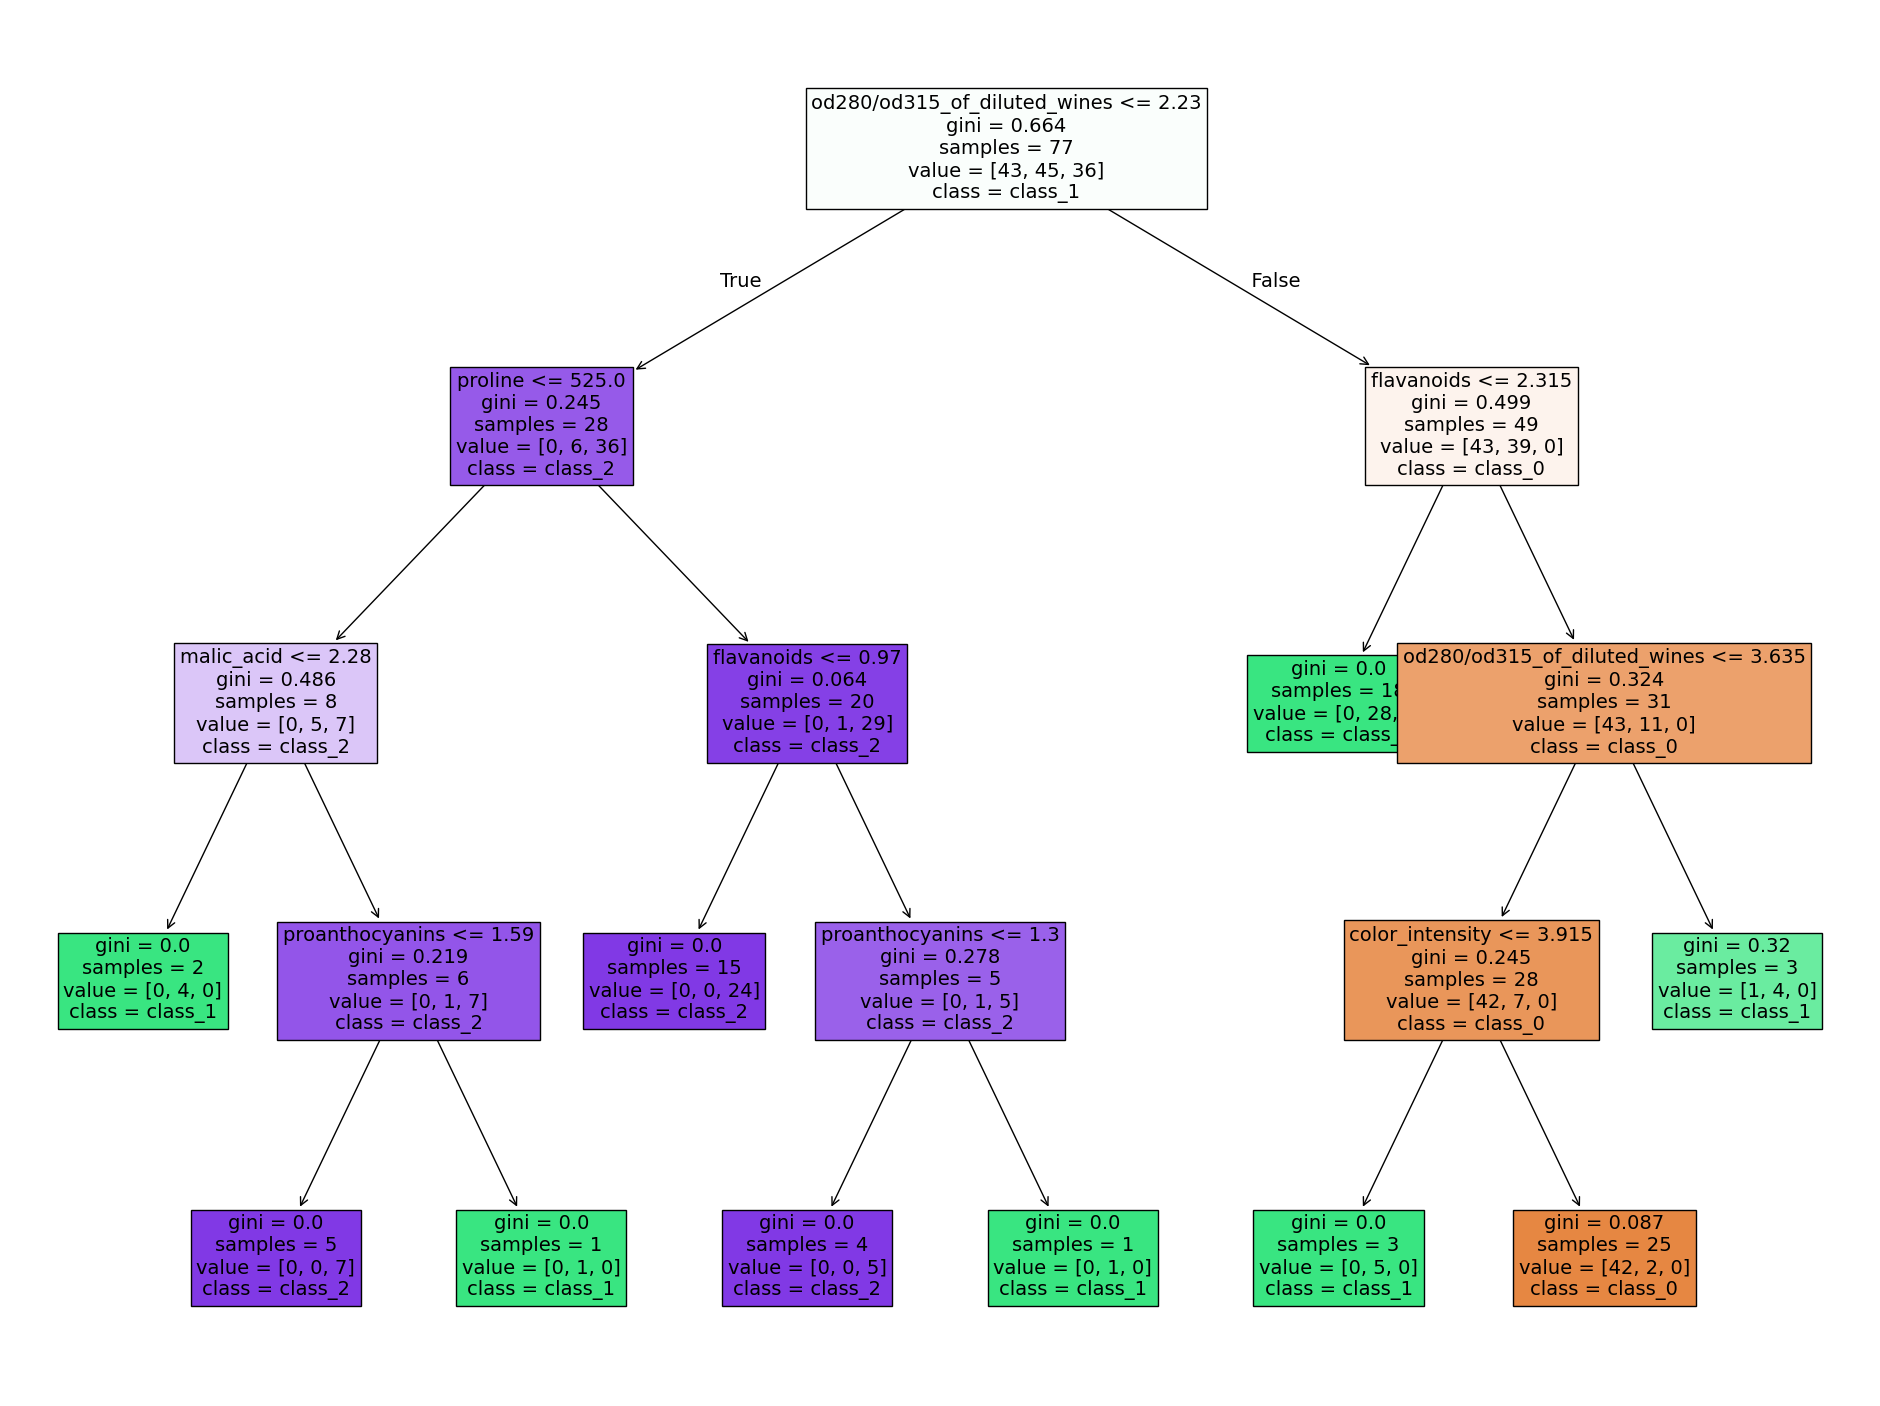

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24,18))
tree.plot_tree(grid_cv.best_estimator_.estimators_[0], # plot the first tree
               feature_names=dataset.feature_names,
               class_names=dataset.target_names,
               fontsize=14,
               filled=True)
plt.show()

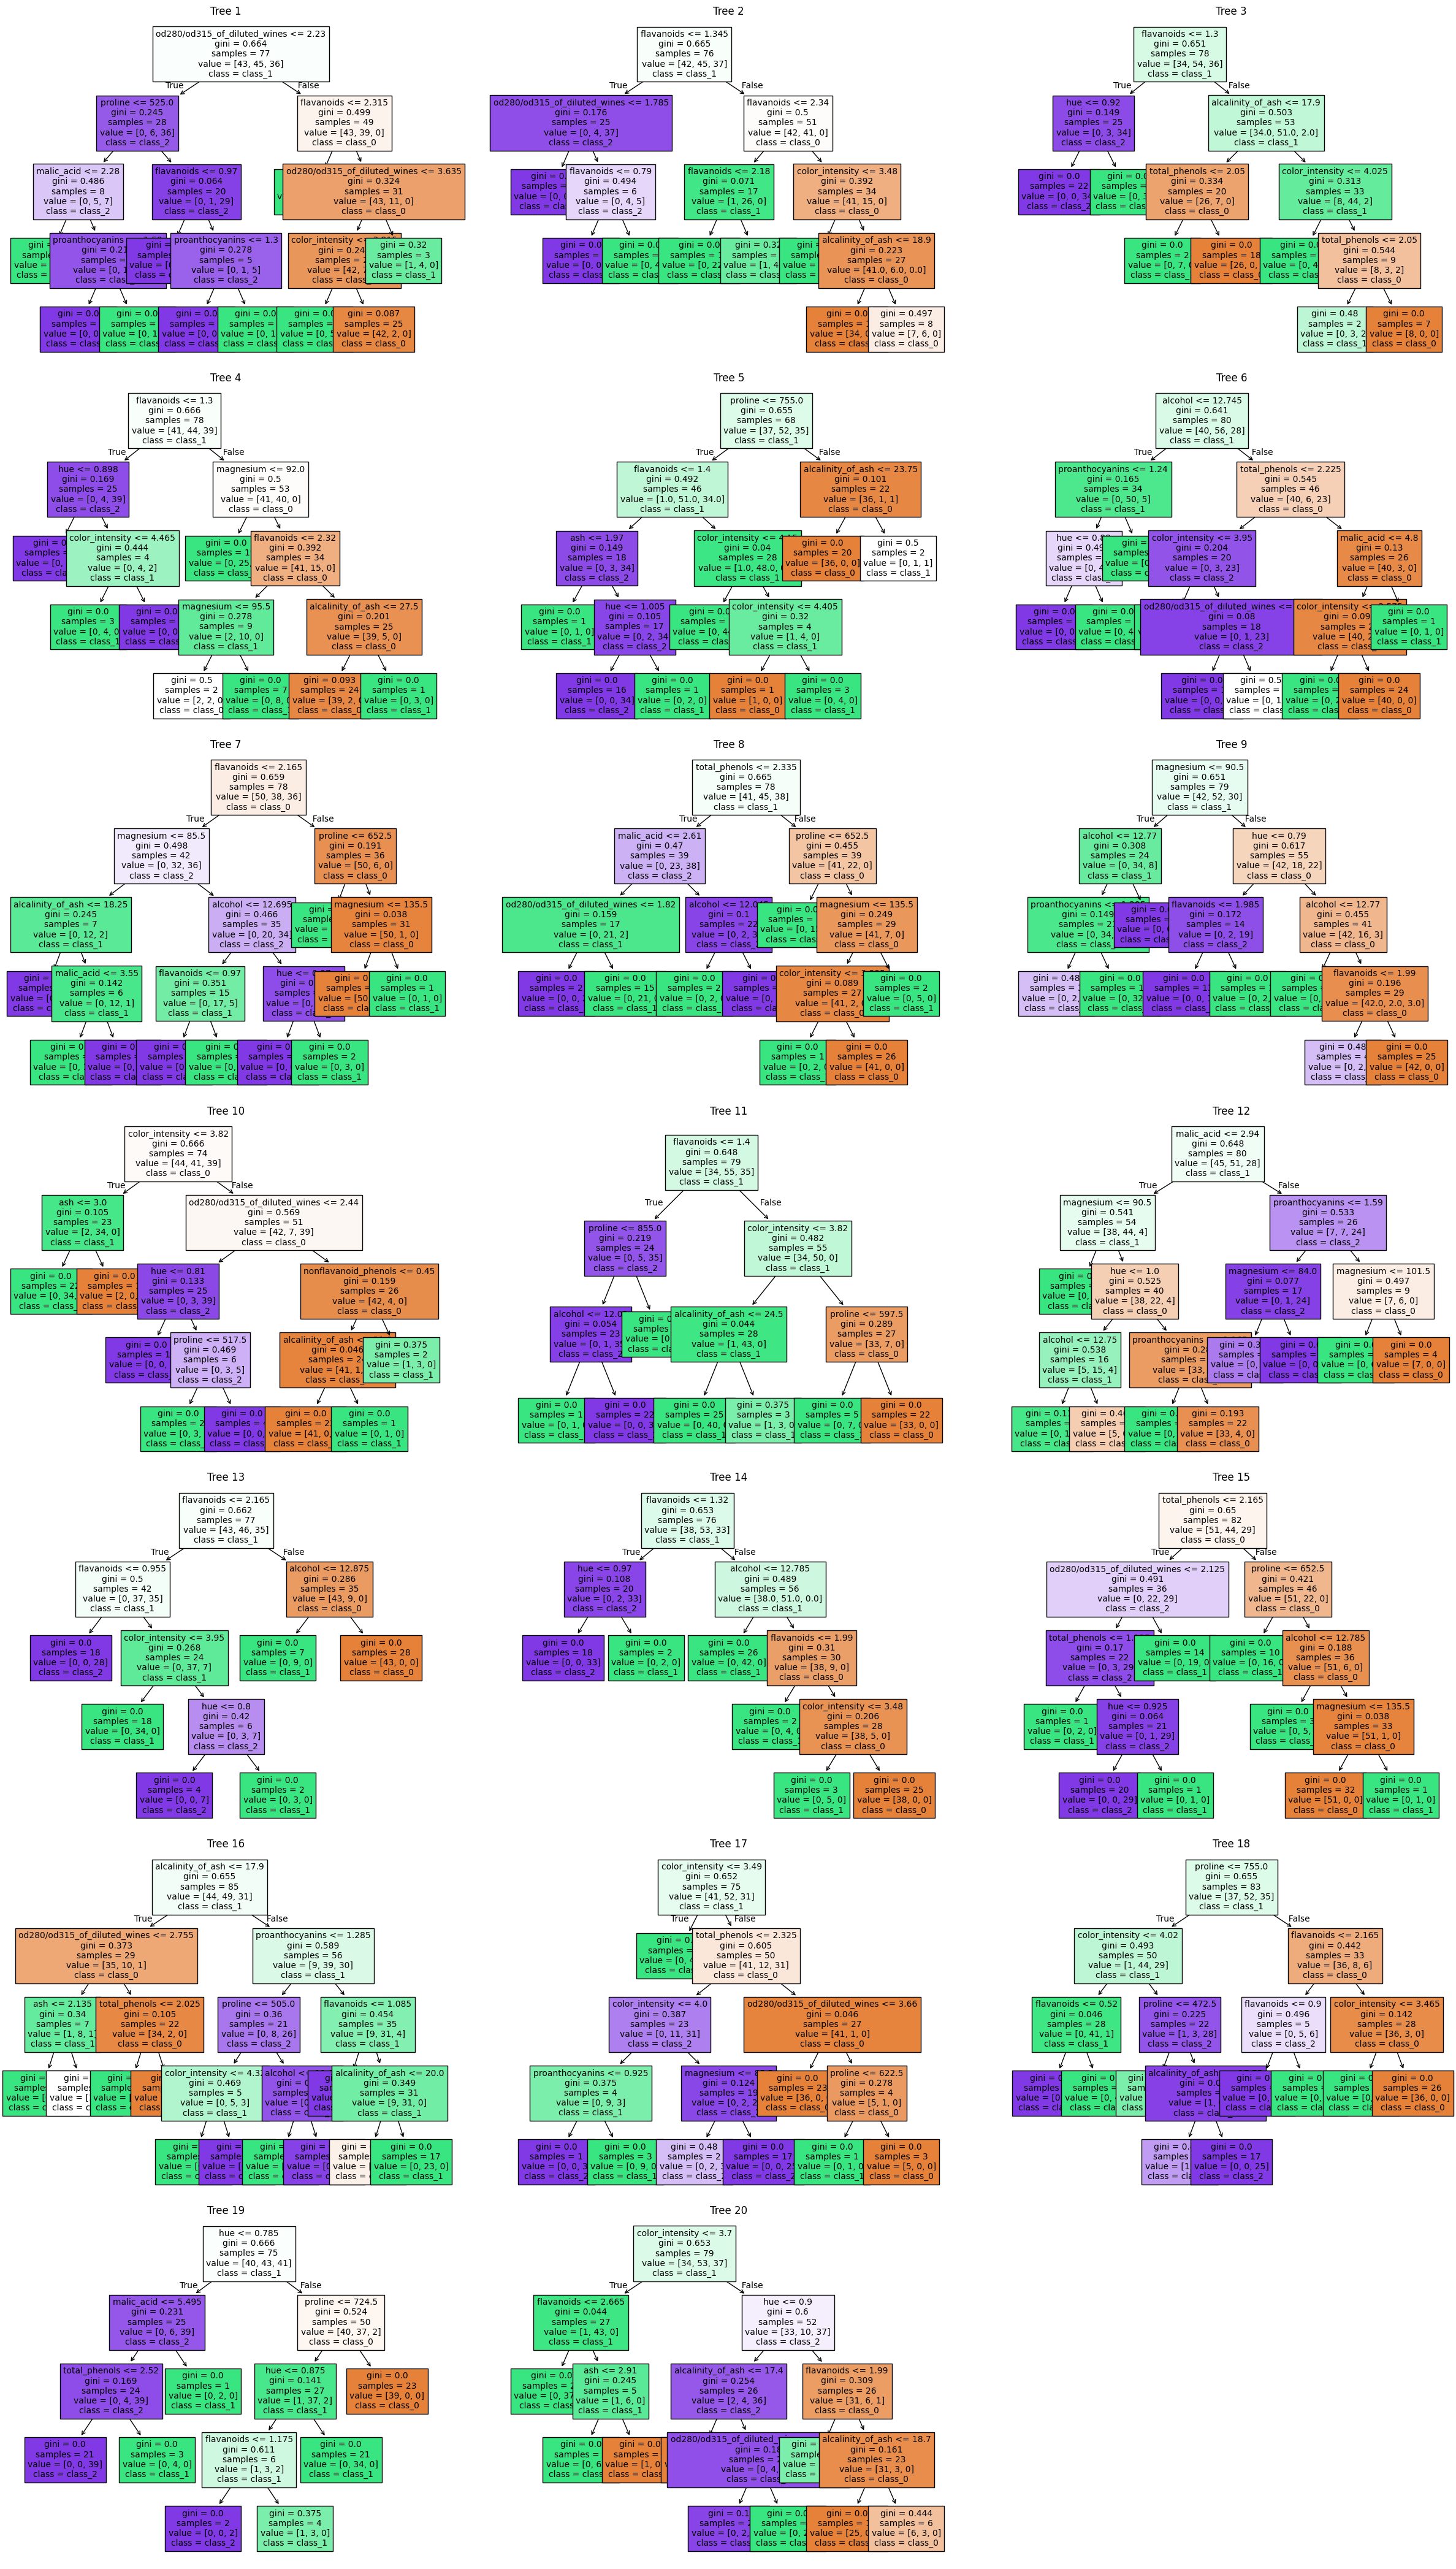

In [11]:
# Alle Bäume des Random Forest visualisieren (in Subplots)
import math
from sklearn import tree
import matplotlib.pyplot as plt

estimators = grid_cv.best_estimator_.estimators_
n_trees = len(estimators)
cols = 3
rows = math.ceil(n_trees / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*8, rows*6))
axes = axes.flatten()

for i, estimator in enumerate(estimators):
    tree.plot_tree(estimator,
                   feature_names=dataset.feature_names,
                   class_names=dataset.target_names,
                   fontsize=10,
                   filled=True,
                   ax=axes[i])
    axes[i].set_title(f"Tree {i+1}")

# Leere Subplots ausblenden
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

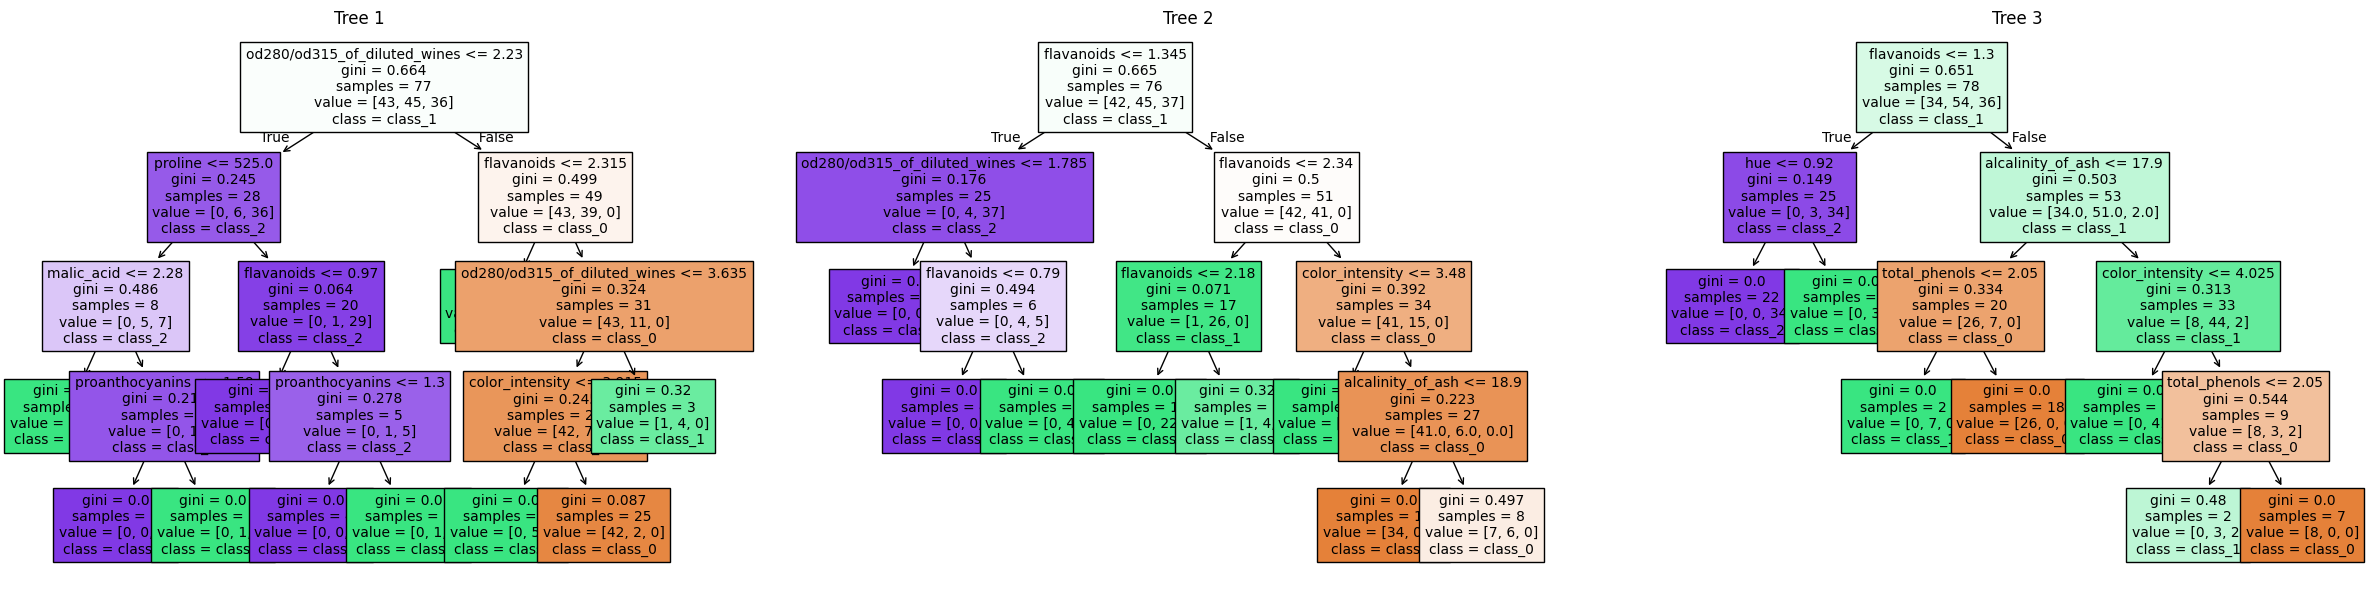

In [12]:
# Nur die ersten drei Bäume des Random Forest visualisieren
from sklearn import tree
import matplotlib.pyplot as plt

estimators = grid_cv.best_estimator_.estimators_[:3]
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

for i, estimator in enumerate(estimators):
    tree.plot_tree(estimator,
                   feature_names=dataset.feature_names,
                   class_names=dataset.target_names,
                   fontsize=10,
                   filled=True,
                   ax=axes[i])
    axes[i].set_title(f"Tree {i+1}")

plt.tight_layout()
plt.show()